In [3]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


import cv2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity, mean_squared_error

def print_separator(title):
    """Функция для красивого вывода разделителей"""
    print("\n" + "-"*60)
    print(f" {title}")
    print("-"*60)

# 1. Загрузка изображения в оттенках серого
print_separator("1. ЗАГРУЗКА ИЗОБРАЖЕНИЯ")
try:
    image = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Файл не найден")

    print(f"Изображение успешно загружено")
    print(f"Размер изображения: {image.shape}")
    print(f"Тип данных: {image.dtype}")
    print(f"Диапазон значений: [{image.min()}, {image.max()}]")
except Exception as e:
    print(f"Ошибка загрузки изображения: {e}")
    exit()



------------------------------------------------------------
 1. ЗАГРУЗКА ИЗОБРАЖЕНИЯ
------------------------------------------------------------
Изображение успешно загружено
Размер изображения: (400, 600)
Тип данных: uint8
Диапазон значений: [0, 255]


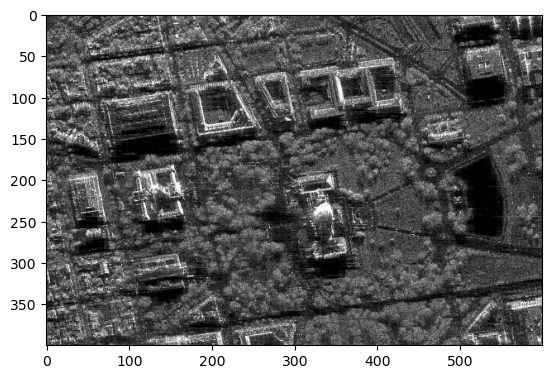

In [5]:
plt.imshow(image, cmap='gray')


------------------------------------------------------------
 2. ГИСТОГРАММА ИЗОБРАЖЕНИЯ
------------------------------------------------------------


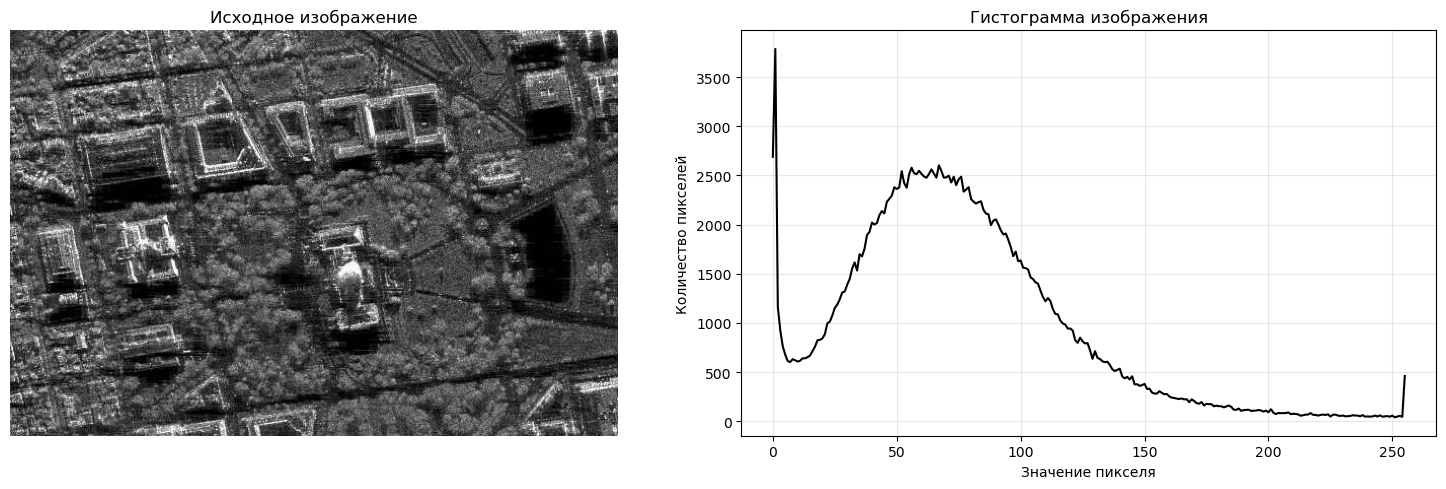

Гистограмма построена и отображена


In [6]:
# 2. Построение и отрисовка гистограммы изображения
print_separator("2. ГИСТОГРАММА ИЗОБРАЖЕНИЯ")
# Вычисление гистограммы
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Отрисовка гистограммы
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Гистограмма изображения')
plt.xlabel('Значение пикселя')
plt.ylabel('Количество пикселей')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Гистограмма построена и отображена")


------------------------------------------------------------
 3. ГАММА-КОРРЕКЦИЯ
------------------------------------------------------------
Гамма-коррекция применена с gamma = 0.5
Гамма-коррекция применена с gamma = 1.5
Гамма-коррекция применена с gamma = 2.0


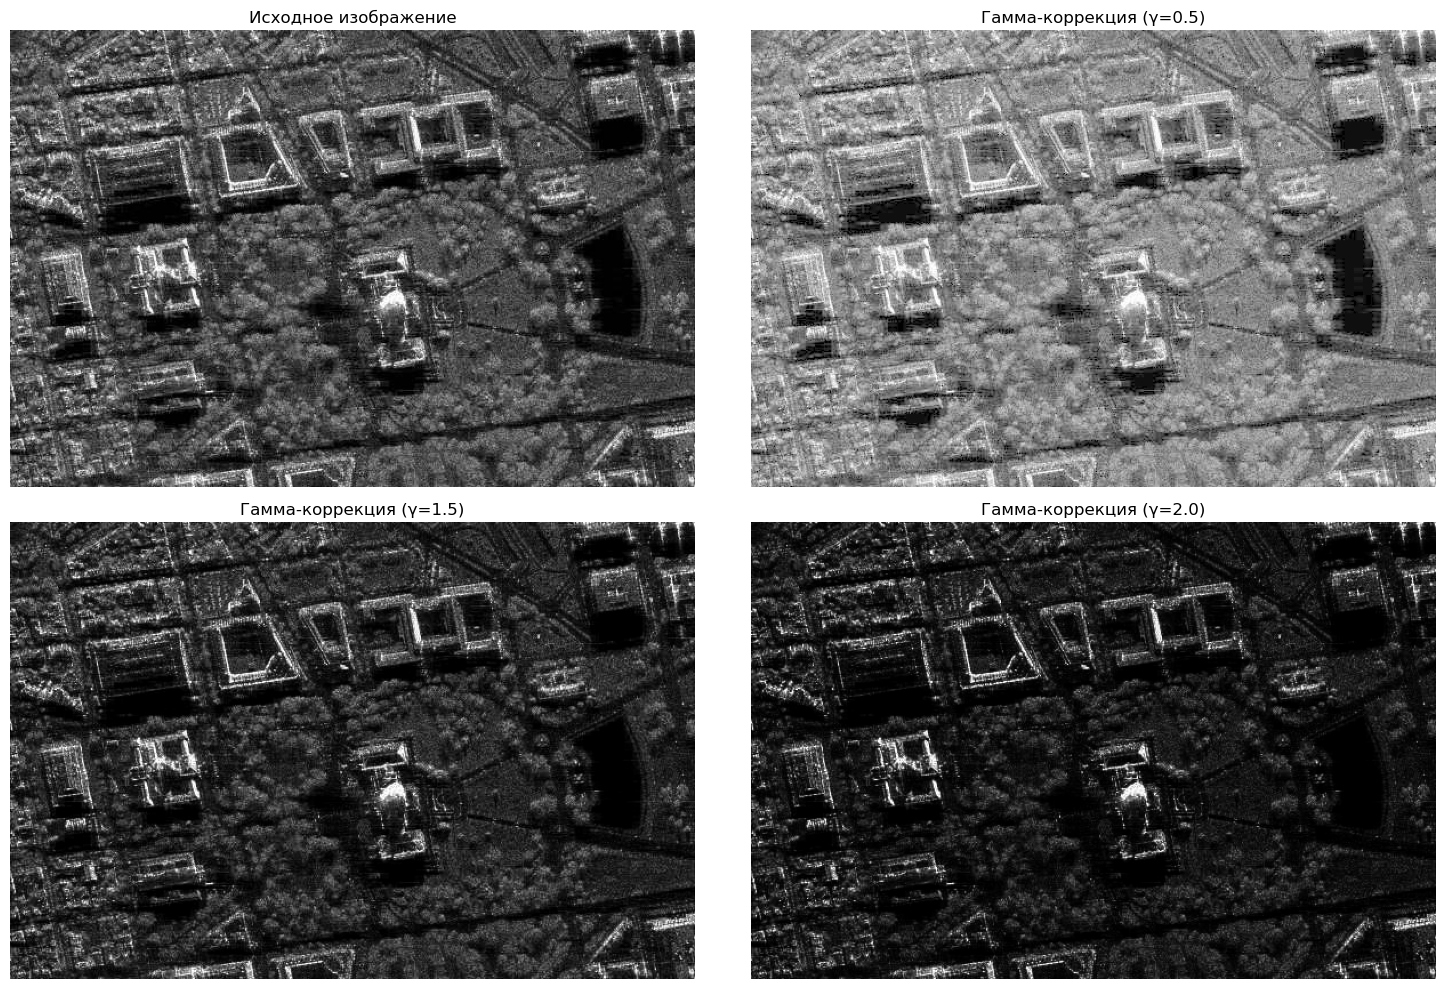

In [7]:
# 3. Реализация алгоритма гамма-коррекции
def gamma_correction(image, gamma):
    """Функция гамма-коррекции"""
    # Нормализация изображения к диапазону [0, 1]
    image_normalized = image.astype(np.float32) / 255.0

    # Применение гамма-коррекции
    corrected = np.power(image_normalized, gamma)

    # Возвращение к диапазону [0, 255]
    return (corrected * 255).astype(np.uint8)

print_separator("3. ГАММА-КОРРЕКЦИЯ")

# Применение гамма-коррекции с разными параметрами
gamma_values = [0.5, 1.5, 2.0]  # gamma <1, >1
gamma_images = {}

for gamma in gamma_values:
    gamma_images[gamma] = gamma_correction(image, gamma)
    print(f"Гамма-коррекция применена с gamma = {gamma}")

# Отображение результатов гамма-коррекции
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Исходное изображение')
plt.axis('off')

for i, gamma in enumerate(gamma_values, 2):
    plt.subplot(2, 2, i)
    plt.imshow(gamma_images[gamma], cmap='gray')
    plt.title(f'Гамма-коррекция (γ={gamma})')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# 4. Сравнение изображений с помощью MSE и SSIM
print_separator("4. СРАВНЕНИЕ ИЗОБРАЖЕНИЙ (MSE и SSIM)")

def compare_images(original, corrected, method_name):
    """Функция для сравнения двух изображений"""
    mse = mean_squared_error(original, corrected)
    ssim = structural_similarity(original, corrected)

    print(f"{method_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  SSIM: {ssim:.4f}")
    return mse, ssim

# Сравнение исходного изображения с гамма-скорректированными
results = {}
for gamma in gamma_values:
    mse, ssim = compare_images(image, gamma_images[gamma], f"Гамма-коррекция (γ={gamma})")
    results[f"gamma_{gamma}"] = {'mse': mse, 'ssim': ssim}


------------------------------------------------------------
 4. СРАВНЕНИЕ ИЗОБРАЖЕНИЙ (MSE и SSIM)
------------------------------------------------------------
Гамма-коррекция (γ=0.5):
  MSE: 3250.4291
  SSIM: 0.7875
Гамма-коррекция (γ=1.5):
  MSE: 971.8207
  SSIM: 0.8066
Гамма-коррекция (γ=2.0):
  MSE: 2383.7636
  SSIM: 0.5270



------------------------------------------------------------
 5. СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ
------------------------------------------------------------
Эквализация гистограммы применена
Эквализация гистограммы:
  MSE: 4021.7967
  SSIM: 0.6991


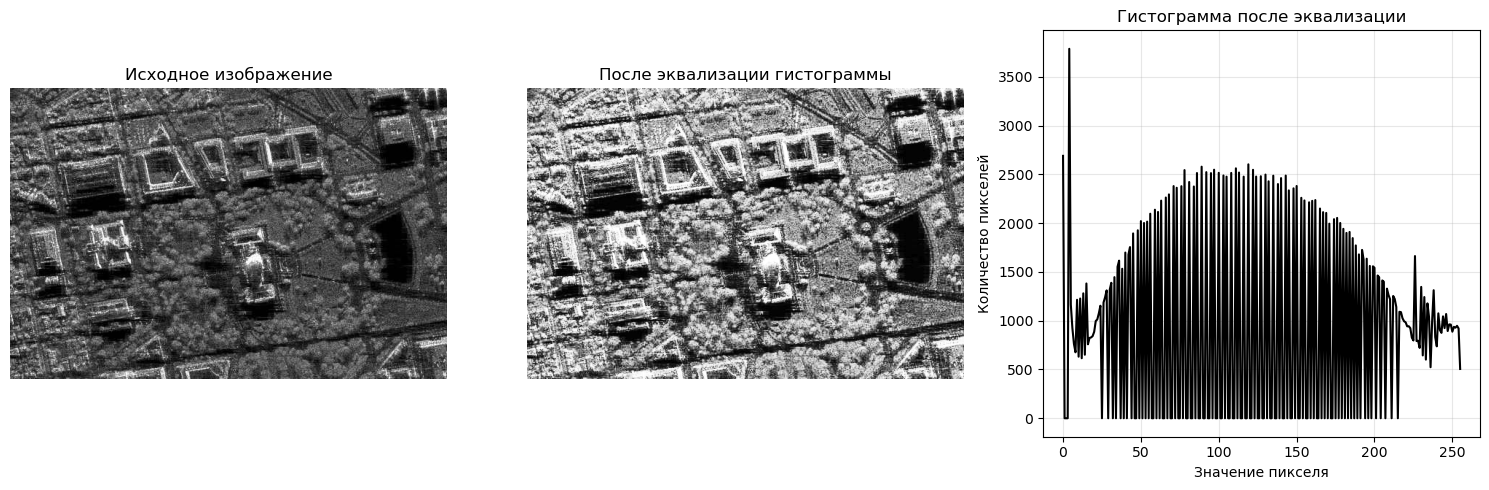

In [9]:
# 5. Статистическая цветокоррекция (эквализация гистограммы)
print_separator("5. СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ")

# Применение эквализации гистограммы
equalized_image = cv2.equalizeHist(image)

print("Эквализация гистограммы применена")

# Сравнение с исходным изображением
mse_eq, ssim_eq = compare_images(image, equalized_image, "Эквализация гистограммы")
results["equalization"] = {'mse': mse_eq, 'ssim': ssim_eq}

# Отображение результатов эквализации
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('После эквализации гистограммы')
plt.axis('off')

# Гистограмма после эквализации
plt.subplot(1, 3, 3)
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.plot(hist_eq, color='black')
plt.title('Гистограмма после эквализации')
plt.xlabel('Значение пикселя')
plt.ylabel('Количество пикселей')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


------------------------------------------------------------
 6. ПОРОГОВАЯ ФИЛЬТРАЦИЯ
------------------------------------------------------------


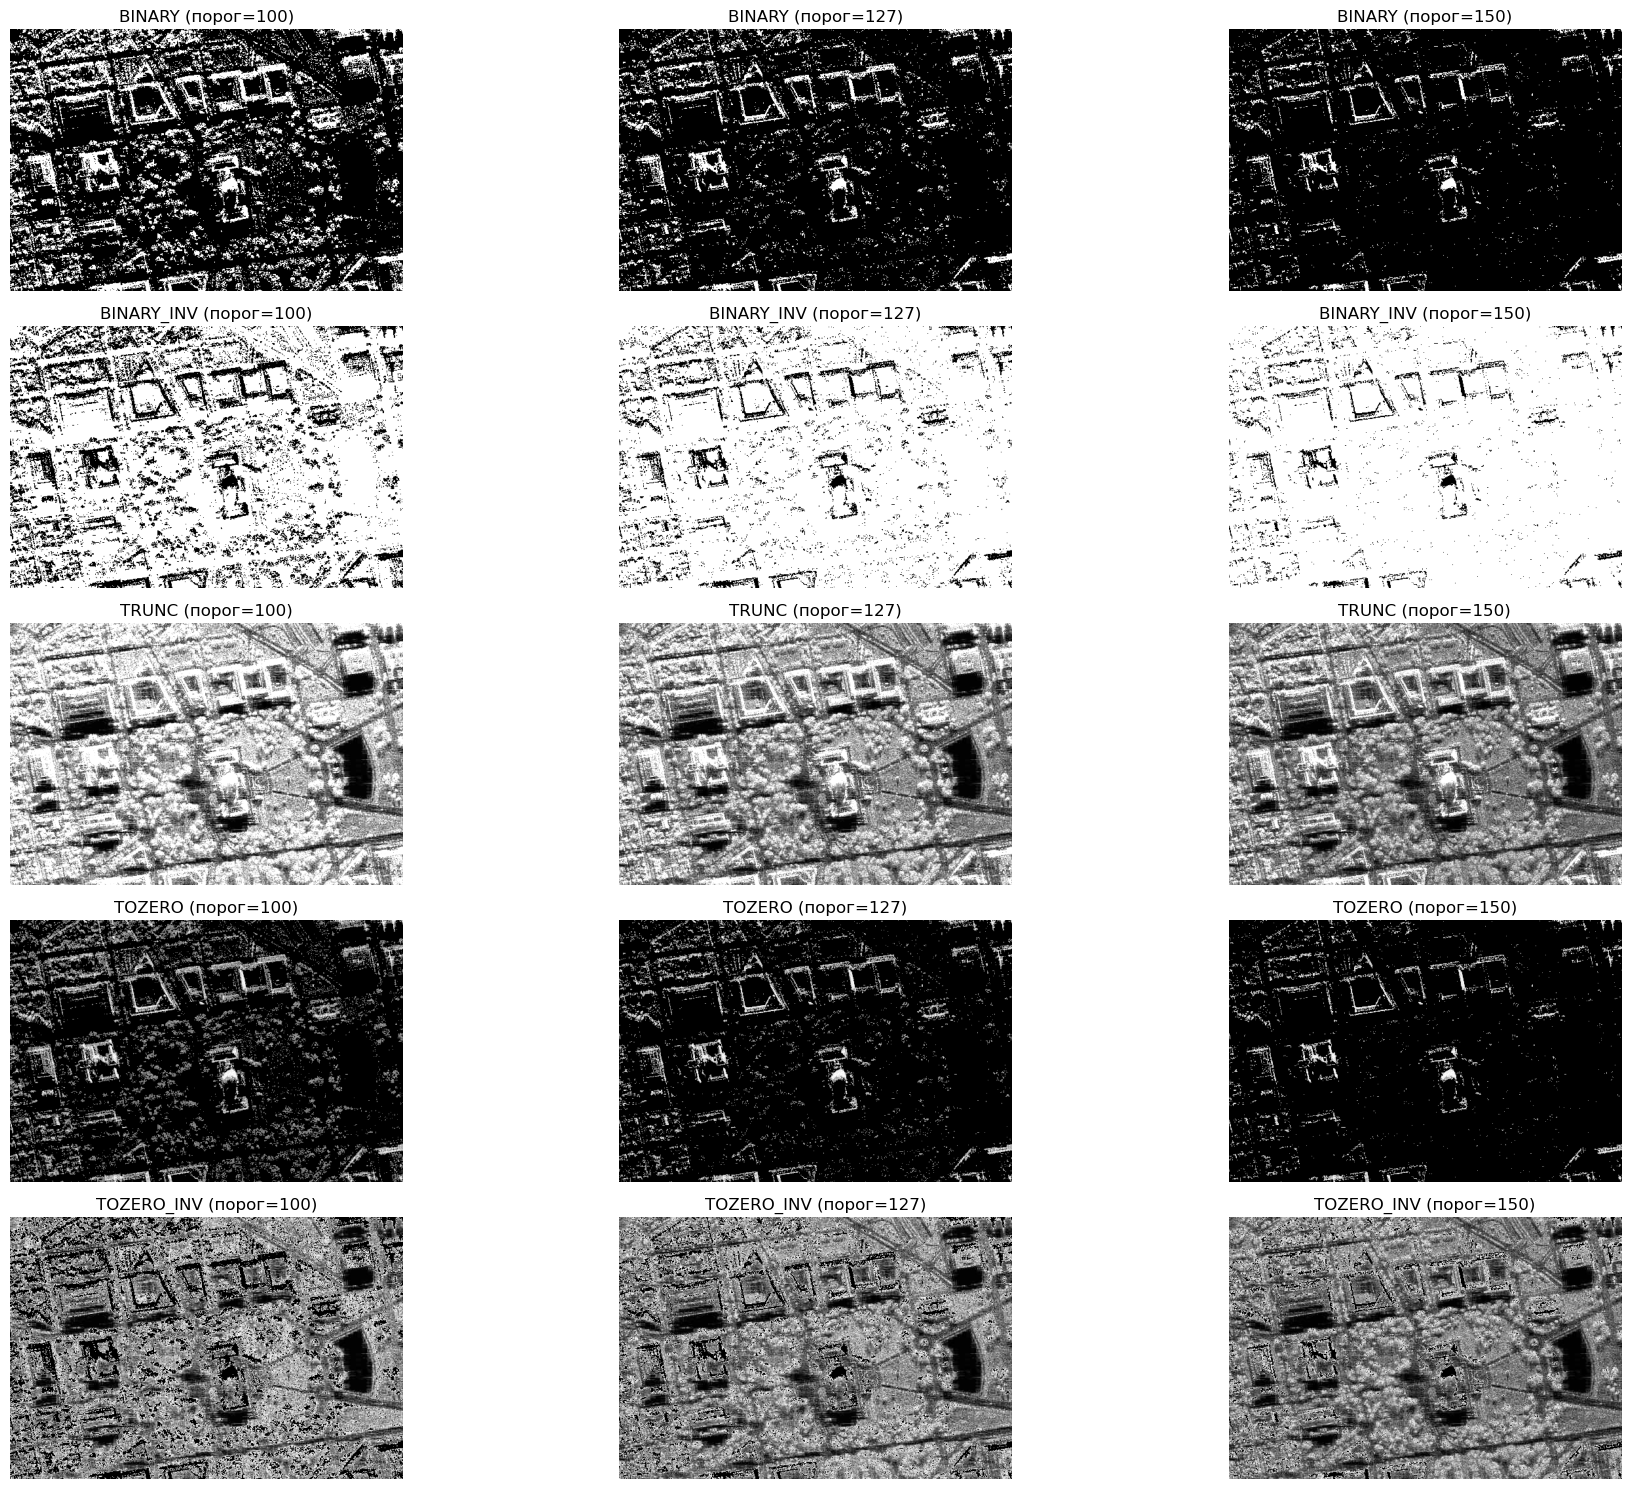

In [10]:
# 6. Тестирование пороговой фильтрации
print_separator("6. ПОРОГОВАЯ ФИЛЬТРАЦИЯ")

def apply_threshold(image, threshold_value, method_name, method):
    """Функция применения пороговой фильтрации"""
    _, thresholded = cv2.threshold(image, threshold_value, 255, method)
    return thresholded

# Различные методы пороговой фильтрации
threshold_methods = {
    'BINARY': cv2.THRESH_BINARY,
    'BINARY_INV': cv2.THRESH_BINARY_INV,
    'TRUNC': cv2.THRESH_TRUNC,
    'TOZERO': cv2.THRESH_TOZERO,
    'TOZERO_INV': cv2.THRESH_TOZERO_INV
}

# Различные значения порога
threshold_values = [100, 127, 150]

# Применение различных методов пороговой фильтрации
threshold_results = {}

plt.figure(figsize=(20, 15))
plot_index = 1

for method_name, method in threshold_methods.items():
    for threshold in threshold_values:
        thresholded_image = apply_threshold(image, threshold, method_name, method)
        threshold_results[f"{method_name}_{threshold}"] = thresholded_image

        plt.subplot(5, 3, plot_index)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'{method_name} (порог={threshold})')
        plt.axis('off')

        plot_index += 1

plt.tight_layout()
plt.show()



In [11]:
# Сравнение результатов пороговой фильтрации с исходным изображением
print("\nСравнение результатов пороговой фильтрации:")
for key, thresholded_img in threshold_results.items():
    mse_th, ssim_th = compare_images(image, thresholded_img, f"Пороговая фильтрация ({key})")
    results[key] = {'mse': mse_th, 'ssim': ssim_th}

print_separator("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")




Сравнение результатов пороговой фильтрации:
Пороговая фильтрация (BINARY_100):
  MSE: 6596.7048
  SSIM: 0.2844
Пороговая фильтрация (BINARY_127):
  MSE: 5603.9144
  SSIM: 0.1889
Пороговая фильтрация (BINARY_150):
  MSE: 5859.9270
  SSIM: 0.1204
Пороговая фильтрация (BINARY_INV_100):
  MSE: 35252.6953
  SSIM: -0.2094
Пороговая фильтрация (BINARY_INV_127):
  MSE: 36245.4858
  SSIM: -0.1615
Пороговая фильтрация (BINARY_INV_150):
  MSE: 35989.4732
  SSIM: -0.1060
Пороговая фильтрация (TRUNC_100):
  MSE: 564.7061
  SSIM: 0.8465
Пороговая фильтрация (TRUNC_127):
  MSE: 256.1402
  SSIM: 0.9406
Пороговая фильтрация (TRUNC_150):
  MSE: 126.0787
  SSIM: 0.9737
Пороговая фильтрация (TOZERO_100):
  MSE: 3000.3595
  SSIM: 0.3596
Пороговая фильтрация (TOZERO_127):
  MSE: 4617.9374
  SSIM: 0.1922
Пороговая фильтрация (TOZERO_150):
  MSE: 5559.7832
  SSIM: 0.1157
Пороговая фильтрация (TOZERO_INV_100):
  MSE: 4521.9411
  SSIM: 0.1265
Пороговая фильтрация (TOZERO_INV_127):
  MSE: 2904.3632
  SSIM: 0.45

In [13]:
# Вывод сводной таблицы результатов
print("Метод обработки\t\t\tMSE\t\tSSIM")
print("-" * 50)
for method, metrics in results.items():
    print(f"{method:25}\t{metrics['mse']:.4f}\t\t{metrics['ssim']:.4f}")

Метод обработки			MSE		SSIM
--------------------------------------------------
gamma_0.5                	3250.4291		0.7875
gamma_1.5                	971.8207		0.8066
gamma_2.0                	2383.7636		0.5270
equalization             	4021.7967		0.6991
BINARY_100               	6596.7048		0.2844
BINARY_127               	5603.9144		0.1889
BINARY_150               	5859.9270		0.1204
BINARY_INV_100           	35252.6953		-0.2094
BINARY_INV_127           	36245.4858		-0.1615
BINARY_INV_150           	35989.4732		-0.1060
TRUNC_100                	564.7061		0.8465
TRUNC_127                	256.1402		0.9406
TRUNC_150                	126.0787		0.9737
TOZERO_100               	3000.3595		0.3596
TOZERO_127               	4617.9374		0.1922
TOZERO_150               	5559.7832		0.1157
TOZERO_INV_100           	4521.9411		0.1265
TOZERO_INV_127           	2904.3632		0.4558
TOZERO_INV_150           	1962.5174		0.6727
